### Setup

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import geopandas as gpd


# For nice plotting styles
sns.set_theme(style="whitegrid")

### Load Data

In [17]:
med_price_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/Median_Price_UK.csv')

print("Median Price DataFrame shape:", med_price_df.shape)

Median Price DataFrame shape: (8053, 114)


In [18]:
incidents_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/LFB Incident data from 2018  - November 2024.csv')

print("Incidents DataFrame shape:", incidents_df.shape)

Incidents DataFrame shape: (794155, 39)


In [19]:
# Load the dataset containing the housing number
pop_data_df = pd.read_csv('/Users/goffy/Desktop/QM/Individual Research/Dataset/ward-atlas-data.csv')

print("Population Data DataFrame shape:", pop_data_df.shape)
pop_data_df.rename(columns={"Unnamed: 1": "WardCode"}, inplace=True)
print(pop_data_df)

Population Data DataFrame shape: (629, 946)
    Unnamed: 0   WardCode            Unnamed: 2         Unnamed: 3  \
0        Codes   New Code               Borough              Names   
1         00AA  E09000001        City of London     City of London   
2       00ABFX  E05000026  Barking and Dagenham              Abbey   
3       00ABFY  E05000027  Barking and Dagenham             Alibon   
4       00ABFZ  E05000028  Barking and Dagenham          Becontree   
..         ...        ...                   ...                ...   
624     00BKGU  E05000648           Westminster         Westbourne   
625     00BKGW  E05000649           Westminster           West End   
626         #1  E12000007                   NaN             London   
627         #2  E92000001                   NaN            England   
628         #3  K04000001                   NaN  England and Wales   

     Population and Age; Population Estimates and Projections; 2001  \
0                                           

In [20]:
# Load the shapefile
london_wards_shp = gpd.read_file('/Users/goffy/Desktop/London-wards-2018/London-wards-2018_ESRI/London_Ward.shp')

print(london_wards_shp.columns)

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry'],
      dtype='object')


In [21]:
# Load the shapefile
UK_wards_shp = gpd.read_file('/Users/goffy/Desktop/Wards_December_2024_Boundaries_UK_BFC_5666400271288124116/WD_DEC_24_UK_BFC.shp')

print(UK_wards_shp.columns)

Index(['WD24CD', 'WD24NM', 'WD24NMW', 'LAD24CD', 'LAD24NM', 'LAD24NMW',
       'BNG_E', 'BNG_N', 'LONG', 'LAT', 'GlobalID', 'geometry'],
      dtype='object')


In [22]:
med_price_df.rename(columns={"Ward code": "WardCode"}, inplace=True)

incidents_df.rename(columns={"IncGeo_WardCode": "WardCode"}, inplace=True)

In [23]:
rail_geo = gpd.read_file('https://raw.github.com/IflyNY2PR/FSDS_URL/refs/heads/main/London_rail/01_LondonRailNetwork.shp')
block_geo = gpd.read_file('https://raw.github.com/IflyNY2PR/FSDS_URL/refs/heads/main/London_street/01_LondonStreetNetwork.shp')

In [24]:
rail_geo = rail_geo.to_crs(epsg=4326)
block_geo = block_geo.to_crs(epsg=4326)

### Data Initialize

##### Fire Incident

In [25]:
# Filter the building_incidents_df to only include incidents from 2018 to 2023
incidents_df = incidents_df[(incidents_df['CalYear'] >= 2018) & (incidents_df['CalYear'] <= 2023)]

print("Filtered Building Related Incidents DataFrame shape:", incidents_df.shape)

Filtered Building Related Incidents DataFrame shape: (670993, 39)


/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_3777/1067449055.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


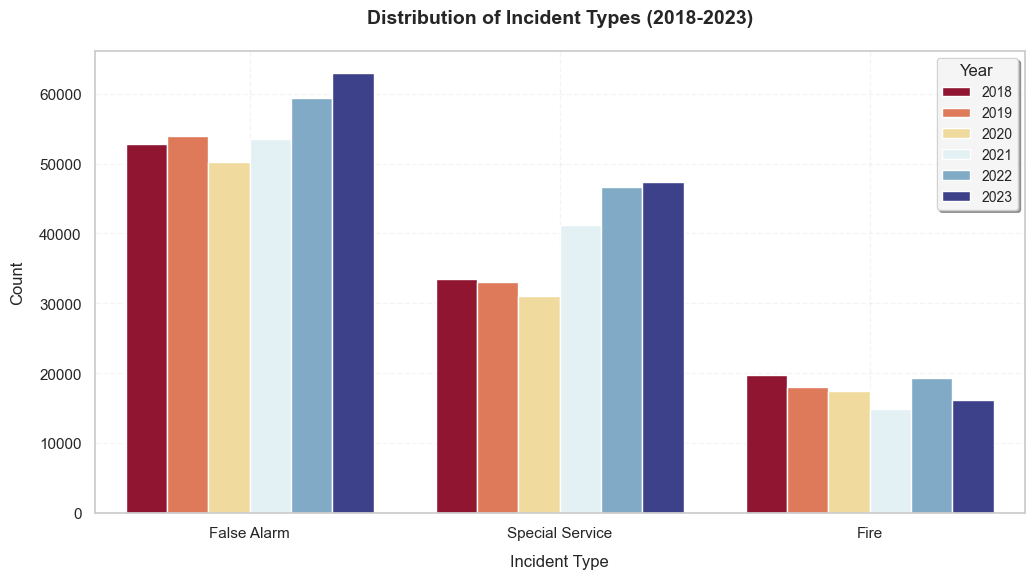

IncidentGroup  False Alarm  Special Service   Fire
CalYear                                           
2018                 52856            33457  19661
2019                 53985            33043  17982
2020                 50187            30980  17401
2021                 53474            41180  14923
2022                 59403            46708  19281
2023                 62978            47383  16111


In [79]:
# Filter the incidents data for the years 2018-2023
filtered_incidents_df = incidents_df[(incidents_df['CalYear'] >= 2018) & (incidents_df['CalYear'] <= 2023)]

# Group by IncidentGroup and CalYear and count the number of incidents for each group
incident_group_counts = filtered_incidents_df.groupby(['IncidentGroup', 'CalYear']).size().reset_index(name='Count')

# Reorder the IncidentGroup categories to have 'Fire' incidents to the right
incident_group_counts['IncidentGroup'] = pd.Categorical(
    incident_group_counts['IncidentGroup'],
    categories=sorted(incident_group_counts['IncidentGroup'].unique(), key=lambda x: (x == 'Fire', x))
)

# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot the bar chart
sns.barplot(x='IncidentGroup', y='Count', hue='CalYear', data=incident_group_counts, palette='RdYlBu', ax=ax)

# Add centered title
ax.set_title('Distribution of Incident Types (2018-2023)', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Incident Type', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)

# Rotate x-ticks for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

# Add legend
ax.legend(title='Year', fontsize='10', loc='upper right', frameon=True, framealpha=0.9, fancybox=True, shadow=True)

plt.show()

# Create a pivot table for better visualization
pivot_table = incident_group_counts.pivot(index='CalYear', columns='IncidentGroup', values='Count').fillna(0)

# Display the pivot table
print(pivot_table)

In [26]:
# Group by PropertyCategory and count the number of incidents for each category
property_category_group = incidents_df.groupby('PropertyCategory').size().reset_index(name='Count')

print(property_category_group)

    PropertyCategory   Count
0           Aircraft     354
1               Boat     358
2           Dwelling  363986
3    Non Residential  141908
4  Other Residential   35174
5            Outdoor   53338
6  Outdoor Structure   30744
7       Rail Vehicle     556
8       Road Vehicle   44575


/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_3777/3484382444.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PropertyCategory', y='Count', data=property_category_group_sorted, palette='Reds_r', ax=ax)
/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_3777/3484382444.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


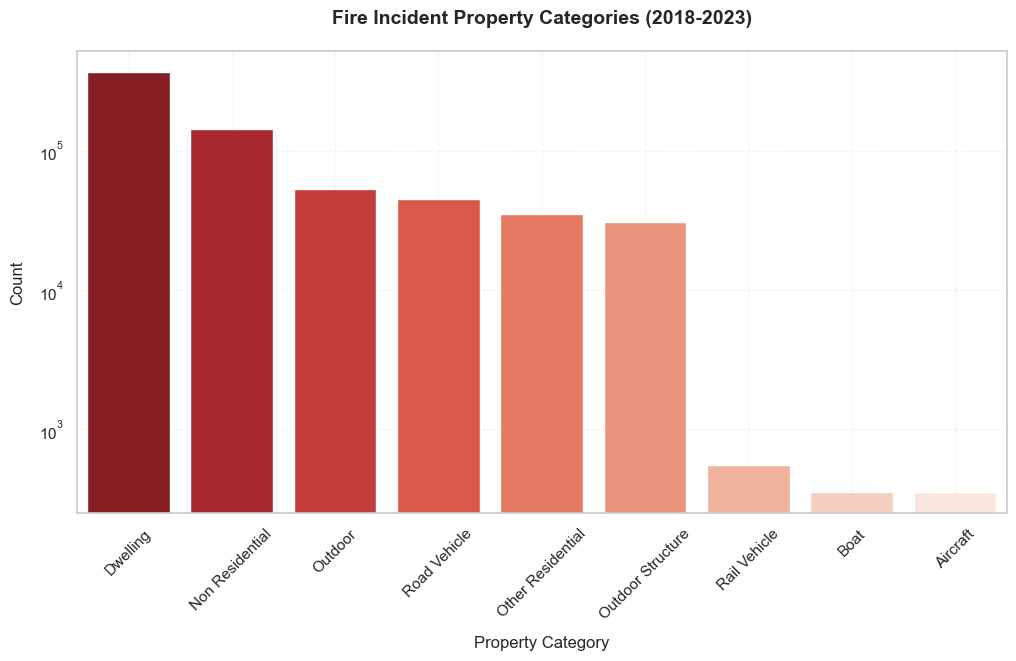

In [72]:
# Sort the property_category_group DataFrame by 'Count' in descending order
property_category_group_sorted = property_category_group.sort_values(by='Count', ascending=False)

# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot the bar chart
sns.barplot(x='PropertyCategory', y='Count', data=property_category_group_sorted, palette='Reds_r', ax=ax)

# Add centered title
ax.set_title('Fire Incident Property Categories (2018-2023)', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Property Category', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)

# Rotate x-ticks for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add grid
ax.grid(True, linestyle='--', alpha=0.2)

plt.show()

In [27]:
building_related_categories = ['Dwelling', 'Other Residential']
building_incidents_df = incidents_df[incidents_df['PropertyCategory'].isin(building_related_categories)]

print("Building Related Incidents DataFrame shape:", building_incidents_df.shape)

Building Related Incidents DataFrame shape: (399160, 39)


In [28]:
incident_group_counts = building_incidents_df.groupby('IncidentGroup').size().reset_index(name='Count')
print(incident_group_counts)

     IncidentGroup   Count
0      False Alarm  200633
1             Fire   32133
2  Special Service  166394


In [29]:
fire_incidents_df = building_incidents_df[incidents_df['IncidentGroup'] == 'Fire']

print("Fire Incidents DataFrame shape:", fire_incidents_df.shape)

Fire Incidents DataFrame shape: (32133, 39)


/var/folders/wb/gskmj0qx18q4nbm5tq4v7hlc0000gn/T/ipykernel_3777/1544403303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fire_incidents_df = building_incidents_df[incidents_df['IncidentGroup'] == 'Fire']


In [30]:
print(fire_incidents_df)

         IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
19      000048-01012018  01-Jan-18     2018   00:33:31           0   
56      000120-01012018  01-Jan-18     2018   01:37:17           1   
64      000139-01012018  01-Jan-18     2018   01:52:29           1   
84      000177-01012018  01-Jan-18     2018   03:30:35           3   
98      000201-01012018  01-Jan-18     2018   04:45:47           4   
...                 ...        ...      ...        ...         ...   
670813  205770-31122023  31-Dec-23     2023   15:00:20          15   
670826  205796-31122023  31-Dec-23     2023   15:31:23          15   
670860  205849-31122023  31-Dec-23     2023   17:04:46          17   
670886  205887-31122023  31-Dec-23     2023   18:16:55          18   
670887  205892-31122023  31-Dec-23     2023   18:24:01          18   

       IncidentGroup StopCodeDescription SpecialServiceType PropertyCategory  \
19              Fire        Primary Fire                NaN         Dwelling   

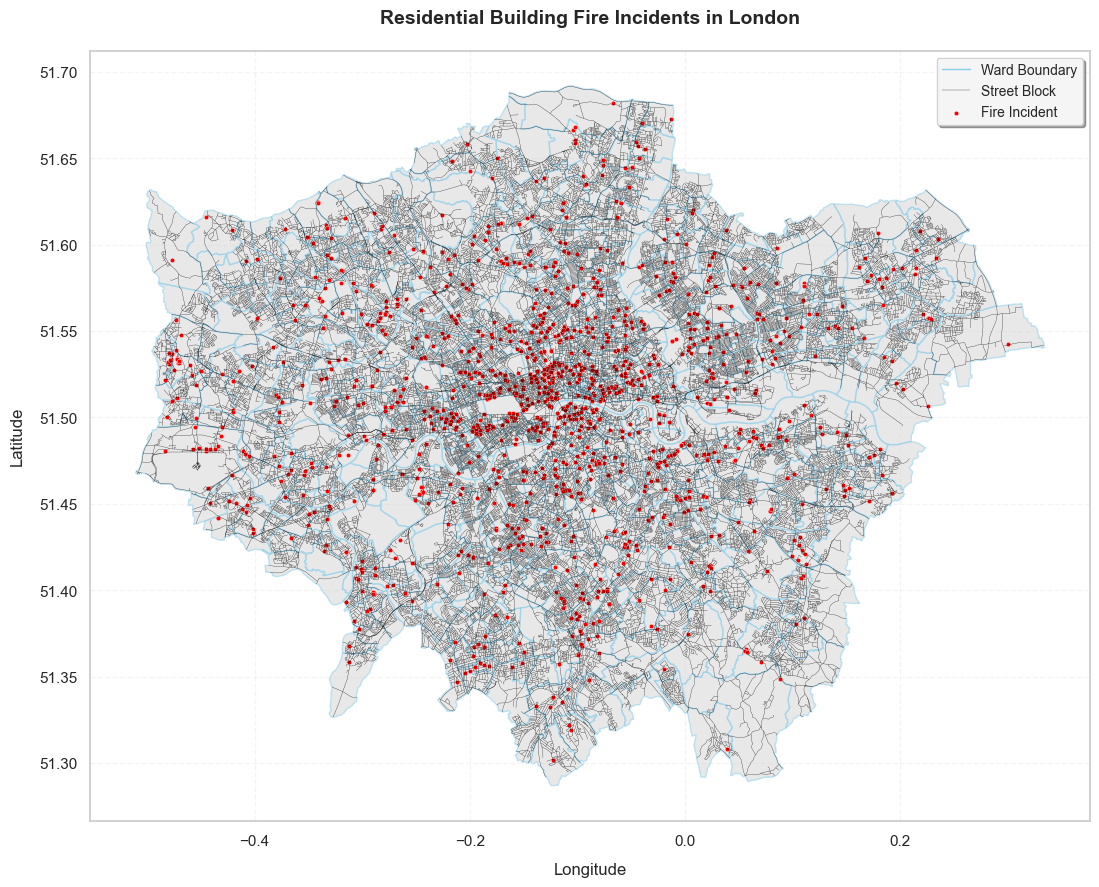

In [31]:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Filter out rows with 0 value in longitude and latitude
fire_incidents_df_filtered = fire_incidents_df[(fire_incidents_df['Longitude'] != 0) & (fire_incidents_df['Latitude'] != 0)]

# Convert the shapefile coordinates to longitude and latitude (WGS84)
london_co_shp = london_wards_shp.to_crs(epsg=4326)

# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the shapefile with blue boundaries
london_co_shp.plot(ax=ax, color='lightgrey', edgecolor='skyblue', alpha=0.5)

# Plot street and rail networks
block_geo.plot(ax=ax, color='black', linewidth=0.2, label='Street Block')

# Plot fire incidents
sns.scatterplot(x=fire_incidents_df_filtered['Longitude'], y=fire_incidents_df_filtered['Latitude'], color='red', s=10, label='Fire Incident', ax=ax)

# Add centered title
ax.set_title('Residential Building Fire Incidents in London', fontsize=14, fontweight='bold', pad=20)

# Add x-label and y-label
ax.set_xlabel('Longitude', fontsize=12, labelpad=10)
ax.set_ylabel('Latitude', fontsize=12, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.2)

# Add legend
ward_line = Line2D([0], [0], color='skyblue', linewidth=1, linestyle='-', label='Ward Boundary')
handles, labels = ax.get_legend_handles_labels()
handles = [ward_line] + handles
labels = ['Ward Boundary'] + labels
ax.legend(handles=handles, fontsize='10', loc='upper right', frameon=True, framealpha=0.9, fancybox=True, shadow=True)

plt.show()


In [32]:
# Convert fire_incidents_df_filtered to a GeoDataFrame
fire_incidents_gdf = gpd.GeoDataFrame(
    fire_incidents_df_filtered, 
    geometry=gpd.points_from_xy(fire_incidents_df_filtered.Longitude, fire_incidents_df_filtered.Latitude),
    crs="EPSG:4326"
)

# Perform a spatial join to count the number of fire incidents in each ward
fire_incidents_in_wards = gpd.sjoin(london_co_shp, fire_incidents_gdf, how="left", predicate="contains")

# Count the number of incidents in each ward
ward_fire_incident_counts = fire_incidents_in_wards.groupby('GSS_CODE').size().reset_index(name='Fire_Incident_Count')

# Rename the GSS_CODE column to WardCode
ward_fire_incident_counts.rename(columns={"GSS_CODE": "WardCode"}, inplace=True)
print(ward_fire_incident_counts)

      WardCode  Fire_Incident_Count
0    E05000026                    1
1    E05000027                    1
2    E05000028                    1
3    E05000029                    1
4    E05000030                    2
..         ...                  ...
652  E05011485                    6
653  E05011486                    2
654  E05011487                    4
655  E05011488                    8
656  E05011489                    1

[657 rows x 2 columns]


In [33]:
# Merge the ward_fire_incident_counts with london_wards_shp on the WardCode column
merged_fire_df = london_wards_shp.merge(ward_fire_incident_counts, left_on='GSS_CODE', right_on='WardCode', how='left')

print("Merged DataFrame shape:", merged_fire_df.shape)
print(merged_fire_df.head())


Merged DataFrame shape: (657, 9)
                     NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  \
0   755.173         0.0  POLYGON ((516401.596 160201.802, 516407.302 16...   
1   259.464         0.0  POLYGON ((519552.998 164295.6, 519508.096 1643...   
2   145.390         0.0  POLYGON ((518107.499 167303.399, 518114.301 16...   
3   268.506         0.0  POLYGON ((520336.7 165105.498, 520332.198 1651...   
4   187.821         0.0  POLYGON ((521201.203 169275.505, 521204.303 16...   

    WardCode  Fire_Incident_Count  
0  E05000405           

##### Housing Price

In [34]:
# Filter the columns to only include the time from 2018-2023
columns_to_keep = ['Local authority code', 'Local authority name', 'WardCode', 'Ward name'] + \
                  [col for col in med_price_df.columns if 'Year ending' in col and '2018' <= col[-4:] <= '2023']
med_price_df = med_price_df[columns_to_keep]

print(med_price_df.columns)

Index(['Local authority code', 'Local authority name', 'WardCode', 'Ward name',
       'Year ending Mar 2018', 'Year ending Jun 2018', 'Year ending Sep 2018',
       'Year ending Dec 2018', 'Year ending Mar 2019', 'Year ending Jun 2019',
       'Year ending Sep 2019', 'Year ending Dec 2019', 'Year ending Mar 2020',
       'Year ending Jun 2020', 'Year ending Sep 2020', 'Year ending Dec 2020',
       'Year ending Mar 2021', 'Year ending Jun 2021', 'Year ending Sep 2021',
       'Year ending Dec 2021', 'Year ending Mar 2022', 'Year ending Jun 2022',
       'Year ending Sep 2022', 'Year ending Dec 2022', 'Year ending Mar 2023'],
      dtype='object')


In [35]:
# Clean the price columns data
for col in columns_to_keep[4:]:
    med_price_df[col] = med_price_df[col].str.replace(',', '').replace(':', np.nan).astype(float)

In [36]:
# Calculate the average price for each ward
med_price_df['Average_Price'] = med_price_df[columns_to_keep[4:]].mean(axis=1)

print(med_price_df[['WardCode', 'Average_Price']])

       WardCode  Average_Price
0     E05008945  106035.714286
1     E05008946  158772.619048
2     E05008947   94035.714286
3     E05008943  126882.142857
4     E05008944  137077.380952
...         ...            ...
8048  W05000895  142250.000000
8049  W05000707  111988.095238
8050  W05000708  157834.523810
8051  W05000710   81904.761905
8052  W05000711  117047.047619

[8053 rows x 2 columns]


In [37]:
# Merge the dataframes on the WardCode and GSS_CODE columns, selecting only the Average_Price column
merged_price_df = london_wards_shp.merge(med_price_df[['WardCode', 'Average_Price']], left_on='GSS_CODE', right_on='WardCode', how='left')

print("Merged DataFrame shape:", merged_price_df.shape)
print(merged_price_df.head())


Merged DataFrame shape: (657, 9)
                     NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  \
0   755.173         0.0  POLYGON ((516401.596 160201.802, 516407.302 16...   
1   259.464         0.0  POLYGON ((519552.998 164295.6, 519508.096 1643...   
2   145.390         0.0  POLYGON ((518107.499 167303.399, 518114.301 16...   
3   268.506         0.0  POLYGON ((520336.7 165105.498, 520332.198 1651...   
4   187.821         0.0  POLYGON ((521201.203 169275.505, 521204.303 16...   

    WardCode  Average_Price  
0  E05000405  400344.047619  

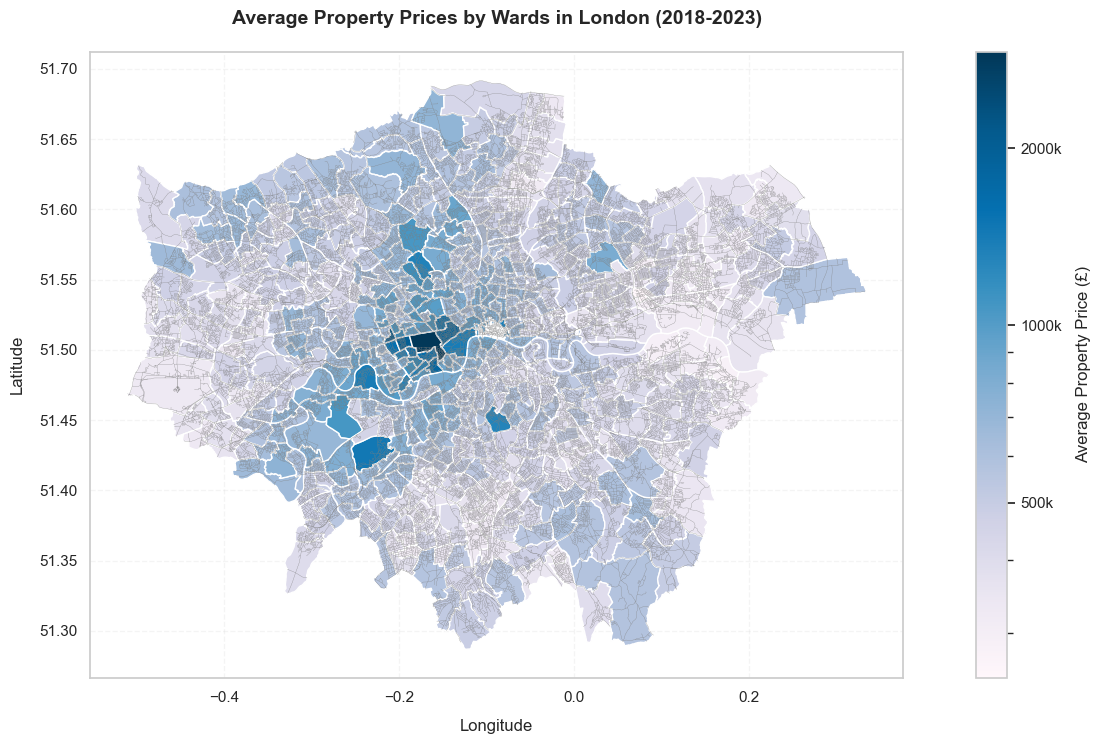

In [101]:
from matplotlib.colors import LogNorm

merged_price_df = merged_price_df.to_crs(epsg=4326)

# Create figure with custom size and layout
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot additional layers
block_geo.plot(ax=ax, color='grey', linewidth=0.2)

# Plot choropleth map with logarithmic scale
norm = LogNorm(vmin=merged_price_df['Average_Price'].min(), vmax=merged_price_df['Average_Price'].max())
merged_price_df.plot(
    column='Average_Price',
    ax=ax,
    cmap='PuBu',
    norm=norm,
    legend=False
)

# Add centered title
ax.set_title('Average Property Prices by Wards in London (2018-2023)', 
             fontsize=14, 
             fontweight='bold',
             pad=20)

# Add longitude and latitude labels
ax.set_xlabel('Longitude', fontsize=12, labelpad=10)
ax.set_ylabel('Latitude', fontsize=12, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.2)

# Adjust layout to place color bar inside the map
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add color bar
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.05, ticks=[500000, 1000000, 2000000])
cbar.set_label('Average Property Price (£)', labelpad=10) 
cbar.ax.set_yticklabels(['500k', '1000k', '2000k'])

plt.show()


### Combine Data

In [39]:
# Merge pop_data_df with merged_price_df
merged_pop_price_df = pd.merge(pop_data_df, merged_price_df[['WardCode', 'Average_Price']], on='WardCode', how='left')

# Merge the result with merged_fire_df
final_merged_df = pd.merge(merged_pop_price_df, merged_fire_df[['WardCode', 'Fire_Incident_Count']], on='WardCode', how='left')

print("Final Merged DataFrame shape:", final_merged_df.shape)
print(final_merged_df.head())

Final Merged DataFrame shape: (629, 948)
  Unnamed: 0   WardCode            Unnamed: 2      Unnamed: 3  \
0      Codes   New Code               Borough           Names   
1       00AA  E09000001        City of London  City of London   
2     00ABFX  E05000026  Barking and Dagenham           Abbey   
3     00ABFY  E05000027  Barking and Dagenham          Alibon   
4     00ABFZ  E05000028  Barking and Dagenham       Becontree   

   Population and Age; Population Estimates and Projections; 2001  \
0                                               2001                
1                                               7350                
2                                              10350                
3                                               9350                
4                                              11550                

   Population and Age; Population Estimates and Projections; 2006  \
0                                               2006                
1              

In [40]:
# Calculate the FireOccurrenceIndex
final_merged_df['FireOccurrenceIndex'] = final_merged_df['Fire_Incident_Count'] / final_merged_df['Population and Age; Population Estimates and Projections; 2018']

print(final_merged_df)

    Unnamed: 0   WardCode            Unnamed: 2         Unnamed: 3  \
0        Codes   New Code               Borough              Names   
1         00AA  E09000001        City of London     City of London   
2       00ABFX  E05000026  Barking and Dagenham              Abbey   
3       00ABFY  E05000027  Barking and Dagenham             Alibon   
4       00ABFZ  E05000028  Barking and Dagenham          Becontree   
..         ...        ...                   ...                ...   
624     00BKGU  E05000648           Westminster         Westbourne   
625     00BKGW  E05000649           Westminster           West End   
626         #1  E12000007                   NaN             London   
627         #2  E92000001                   NaN            England   
628         #3  K04000001                   NaN  England and Wales   

     Population and Age; Population Estimates and Projections; 2001  \
0                                                 2001                
1                